In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [91]:
file_path = '../PCA/pd_speech_features.csv'

df = pd.read_csv(file_path)
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.3

In [92]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

In [93]:
X = df.drop('class', axis='columns')
y = df['class']

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Transform to 2D using PCA

In [95]:
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))
transformed.head()

,0,1
0,10.047372,1.471072
1,10.637725,1.583748
2,13.516186,-1.253546
3,9.155082,8.833612
4,6.764466,4.611498


In [96]:
transformed.shape

(756, 2)

### Plot show the relationship betweens data layers

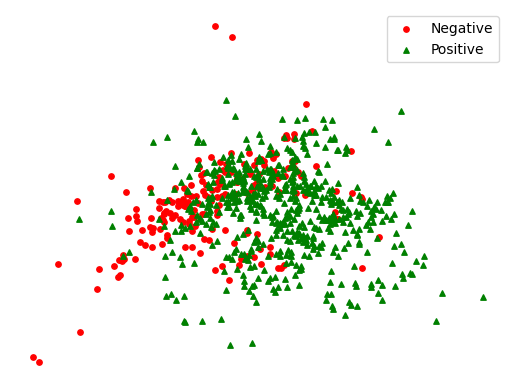

In [97]:
plt.axis("off")
plt.scatter(transformed[y==0][0], transformed[y==0][1], s=15, label='Negative',
c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], s=15, label='Positive',
c='green', marker="^")
plt.legend()

### Using PCA to reduce Dim of data to 200

In [98]:
pca_200 = PCA(n_components=200)
X_200 = pd.DataFrame(pca_200.fit_transform(X))
X_200.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,10.047372,1.471076,-6.846403,0.782090,-3.440104,-0.053211,-1.961622,0.938703,0.439760,0.443664,-0.373604,-0.942445,-0.750125,0.840030,1.304198,-0.540088,-1.138292,1.622951,-1.326226,0.534248,1.177554,-3.351391,2.810868,0.322688,1.336805,0.741124,-0.365576,0.394117,0.903106,0.115855,-0.008326,1.447990,1.054719,0.425739,1.750106,-1.784308,1.473084,0.820385,-1.357914,-0.360018,...,0.220583,-0.700624,2.080325,-0.105473,0.306113,-0.795618,0.682866,-0.753954,-0.957379,-1.931982,0.248532,-0.653760,-0.009303,-0.463972,-0.327460,-0.461685,0.068109,1.220292,0.009604,0.689253,0.159720,0.278666,-0.079178,0.139043,0.365936,0.476036,-0.350856,-0.831283,-0.370783,-0.003786,1.074226,-0.052087,-0.435278,-0.496609,0.691212,0.331399,-0.148937,-0.907140,-0.218777,-0.681915
1,10.637725,1.583749,-6.830977,-1.415978,-3.200763,1.724359,-2.109023,2.244262,0.611481,-1.269873,1.400252,0.551378,-1.365308,0.439937,0.093214,-1.920912,0.089009,-0.383272,0.458216,1.634947,3.203663,-1.390193,2.406827,-0.852190,1.907176,0.606518,-0.223258,-1.051538,-1.013568,-1.317362,-1.841850,1.196736,-1.276628,2.218966,-0.517394,0.769337,1.847309,1.211465,-2.621199,0.911480,...,-0.893026,-1.258430,0.256307,-0.791006,-0.128992,1.550419,0.065552,0.094527,-0.187379,-0.673878,1.323766,0.377710,0.070060,-0.702817,1.170323,-0.669136,-1.059107,0.227966,-0.094310,0.419576,0.085846,0.794650,-1.045001,0.164816,-0.461429,0.831432,-0.086682,0.634134,0.386146,-0.400866,0.234448,0.646800,-1.400721,-0.926665,1.412747,0.723991,-0.805601,-0.426810,-0.615290,-0.357455
2,13.516185,-1.253543,-6.818697,-1.412663,-2.284051,2.567104,-0.715751,1.084772,0.094906,1.508015,-1.380211,-0.609315,-0.678861,0.593888,0.714265,-0.255931,-1.271376,2.103149,-0.657027,1.404662,0.443889,-1.748806,2.375673,-0.477995,1.431868,1.205298,1.617541,1.201283,0.425273,-0.040079,-0.736131,0.070004,-0.418591,0.857369,0.817214,-2.639291,0.638616,0.335096,-0.635733,-0.444535,...,-1.536410,-1.201718,0.271398,-0.134173,-0.395637,-0.311824,-0.009611,-0.369448,-0.201429,-1.102398,-0.027300,0.258520,0.043413,-0.817932,-0.517688,-0.221517,-0.257473,0.495939,-0.614981,0.714966,1.017044,-0.565930,-0.242543,0.135870,-0.526011,-0.281105,-0.904390,0.127493,-0.632023,0.132686,-0.197291,0.797455,-0.465845,-0.648511,0.911241,0.280917,0.182842,-0.253721,0.274203,-0.681354
3,9.155084,8.833599,15.290902,4.036450,-5.139307,-9.570305,2.916914,-5.211686,-4.798296,-5.187648,5.566751,0.455109,-5.715813,-2.558441,1.566789,-2.116052,0.590373,0.426744,0.892929,-0.629598,-0.058952,-1.107193,-1.319043,1.665208,2.593169,-2.769462,3.444155,-3.991681,1.965958,-1.192244,-1.215953,-3.122710,2.012319,1.693916,-3.114940,0.021966,1.795547,0.949667,0.206783,0.165447,...,1.383623,0.303945,0.961519,0.378990,1.140745,0.168544,0.867289,-0.083639,0.189409,1.045897,-1.234157,0.821425,0.818846,1.323694,-0.221966,-0.068974,1.038078,0.682502,-0.079467,0.740099,0.152500,-0.465763,-1.800247,0.736512,-0.408312,1.717531,-0.006809,-0.356487,0.518726,0.951907,-0.446535,1.564776,-0.631820,0.594174,-0.382234,0.384491,0.411124,-0.062871,-0.399602,0.349487
4,6.764470,4.611466,15.637120,5.847869,-5.794315,-11.050847,1.310732,-5.387018,-7.927639,-7.284769,1.806299,1.152369,-4.643320,-3.800561,0.537805,-0.578515,0.795062,-0.691731,-0.106867,-0.200077,-1.351680,-1.680951,-1.876340,1.075412,1.474360,-4.705441,1.804523,-3.540907,1.466932,-0.626646,-4.188347,-2.999358,2.290614,-0.022788,-1.737837,-1.829963,0.690078,-1.169233,0.813986,0.454720,...,1.238255,-0.225151,0.016642,0.047206,-0.132146,0.266334,-0.271579,0.319807,1.157625,-0.341913,-0.343298,0.139158,0.187923,0.337715,-1.248903,-1.105591,0.274353,0.059537,0.500973,0.393506,0.500058,-0.955680,0.062371,1.517819,-0.583923,0.850956,0.382868,-0.874370,0.260265,

In [99]:
X_200_train, X_200_test, y_200_train, y_200_test = train_test_split(X_200, y, train_size=500/756, random_state=18)

logR = LogisticRegression(multi_class='multinomial', solver='sag')
logR.fit(X_200_train, y_200_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [100]:
y_200_pred = logR.predict(X_200_test)

print(accuracy_score(y_200_test, y_200_pred))

0.84765625


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500/756, random_state=18)


X_train = pca_200.fit_transform(X_train)
X_test = pca_200.fit_transform(X_test)

logR.fit(X_train, y_train)



LogisticRegression(multi_class='multinomial', solver='sag')

In [102]:
y_pred = logR.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6640625


**Độ chính xác khi chia dữ liệu trước rồi giảm chiều về 200 xong thực hiện tính toán sẽ thấp hơn độ chính xác của việc giảm chiều trước sau đó mới chia dữ liệu ra**

In [103]:
pca_4 = PCA(0.8)

X_4 = pca_4.fit_transform(X)
X_4.shape

(756, 61)

**Dữ liệu mới còn 61 chiều ứng với lượng thông tin được giữ lại ít nhất đạt 80%**

In [104]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, train_size=500/756, random_state=18)

logR.fit(X_train_4, y_train_4)


LogisticRegression(multi_class='multinomial', solver='sag')

In [105]:
y_pred_4 = logR.predict(X_test_4)

print(accuracy_score(y_test_4, y_pred_4))

0.87109375


In [106]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=1/6*2, random_state=18)

In [107]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_5, y_train_5)
y_pred_nb = nb.predict(X_test_5) 
print(accuracy_score(y_test_5, y_pred_nb))

0.8253968253968254


In [108]:
logR.fit(X_train_5, y_train_5)
y_pred_5 = logR.predict(X_test_5)
accuracy_score(y_test_5, y_pred_5)

0.8333333333333334

**Sử dụng dữ liệu ở ý 4.a**

In [109]:
nb.fit(X_train_4, y_train_4)
y_pred_nb = nb.predict(X_test_4) 
print(accuracy_score(y_test_4, y_pred_nb))

0.75390625


In [110]:
logR.fit(X_train_4, y_train_4)
y_pred_5 = logR.predict(X_test_4)
accuracy_score(y_test_4, y_pred_5)

0.87109375

**Mô hình Naive Bayes có độ chính xác thay đổi nhiều hơn**